In [288]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [289]:
os.getcwd()

'/content'

In [290]:
data = pd.read_csv('/content/housing (2).csv')

In [291]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,NaN,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18,697,150.0,356,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349.0,1.8672,84700.0,INLAND


In [292]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20429 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20636 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20638 non-null  float64
 9   ocean_proximity     20637 non-null  object 
dtypes: float64(6), int64(3), object(1)
memory usage: 1.6+ MB


In [293]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        211
population              0
households              4
median_income           0
median_house_value      2
ocean_proximity         3
dtype: int64

In [294]:
per_missing=data.isnull().sum()*100/len(data)
per_missing

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.022287
population            0.000000
households            0.019380
median_income         0.000000
median_house_value    0.009690
ocean_proximity       0.014535
dtype: float64

<Axes: >

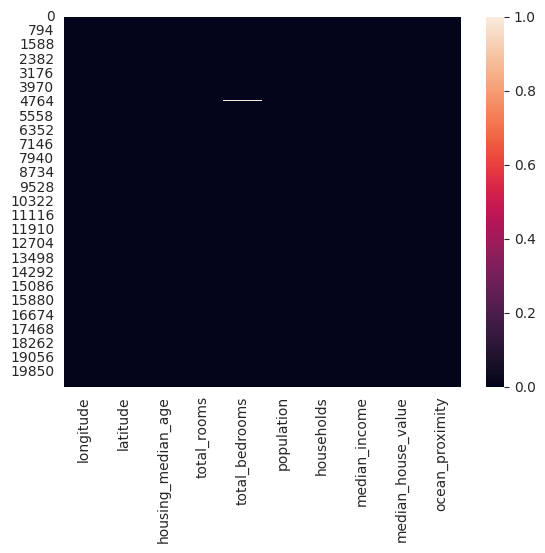

In [295]:
sns.heatmap(data.isnull())


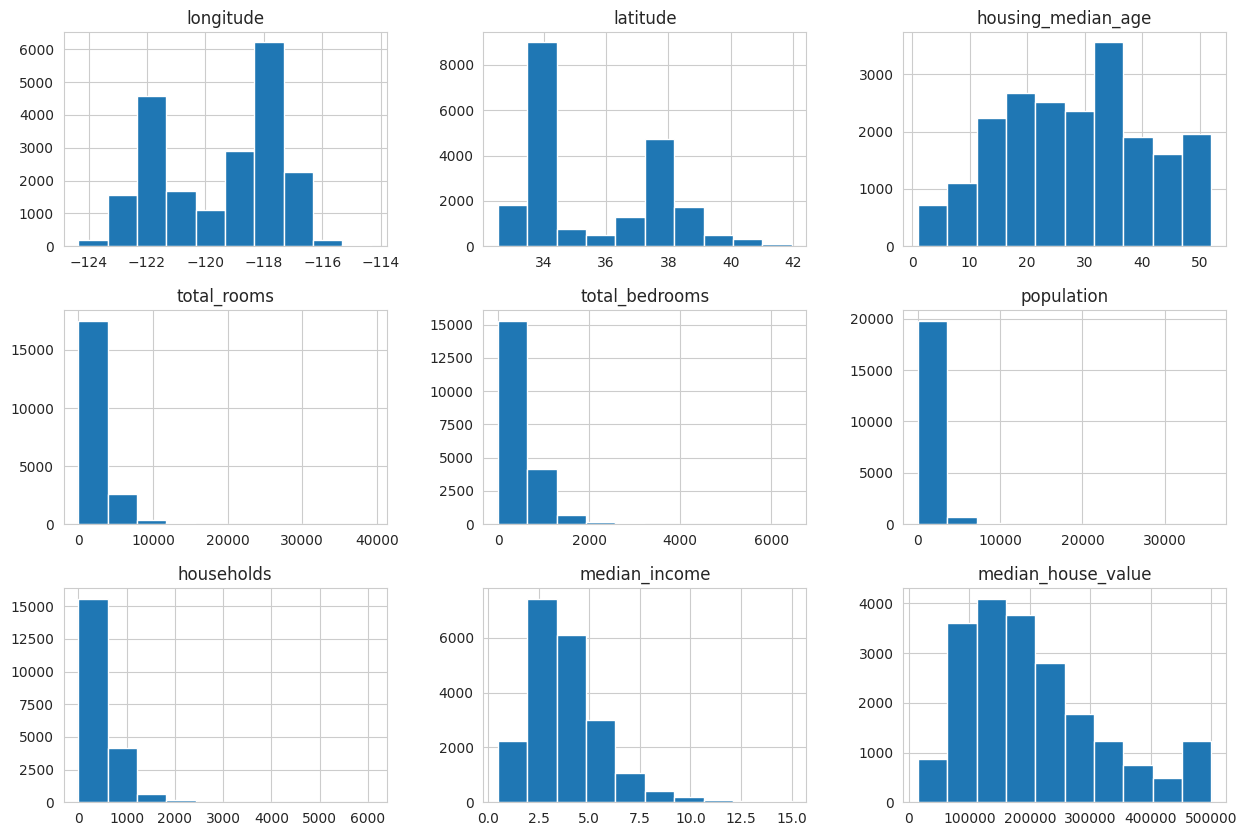

In [296]:
data.hist(figsize=(15,10))
plt.show()

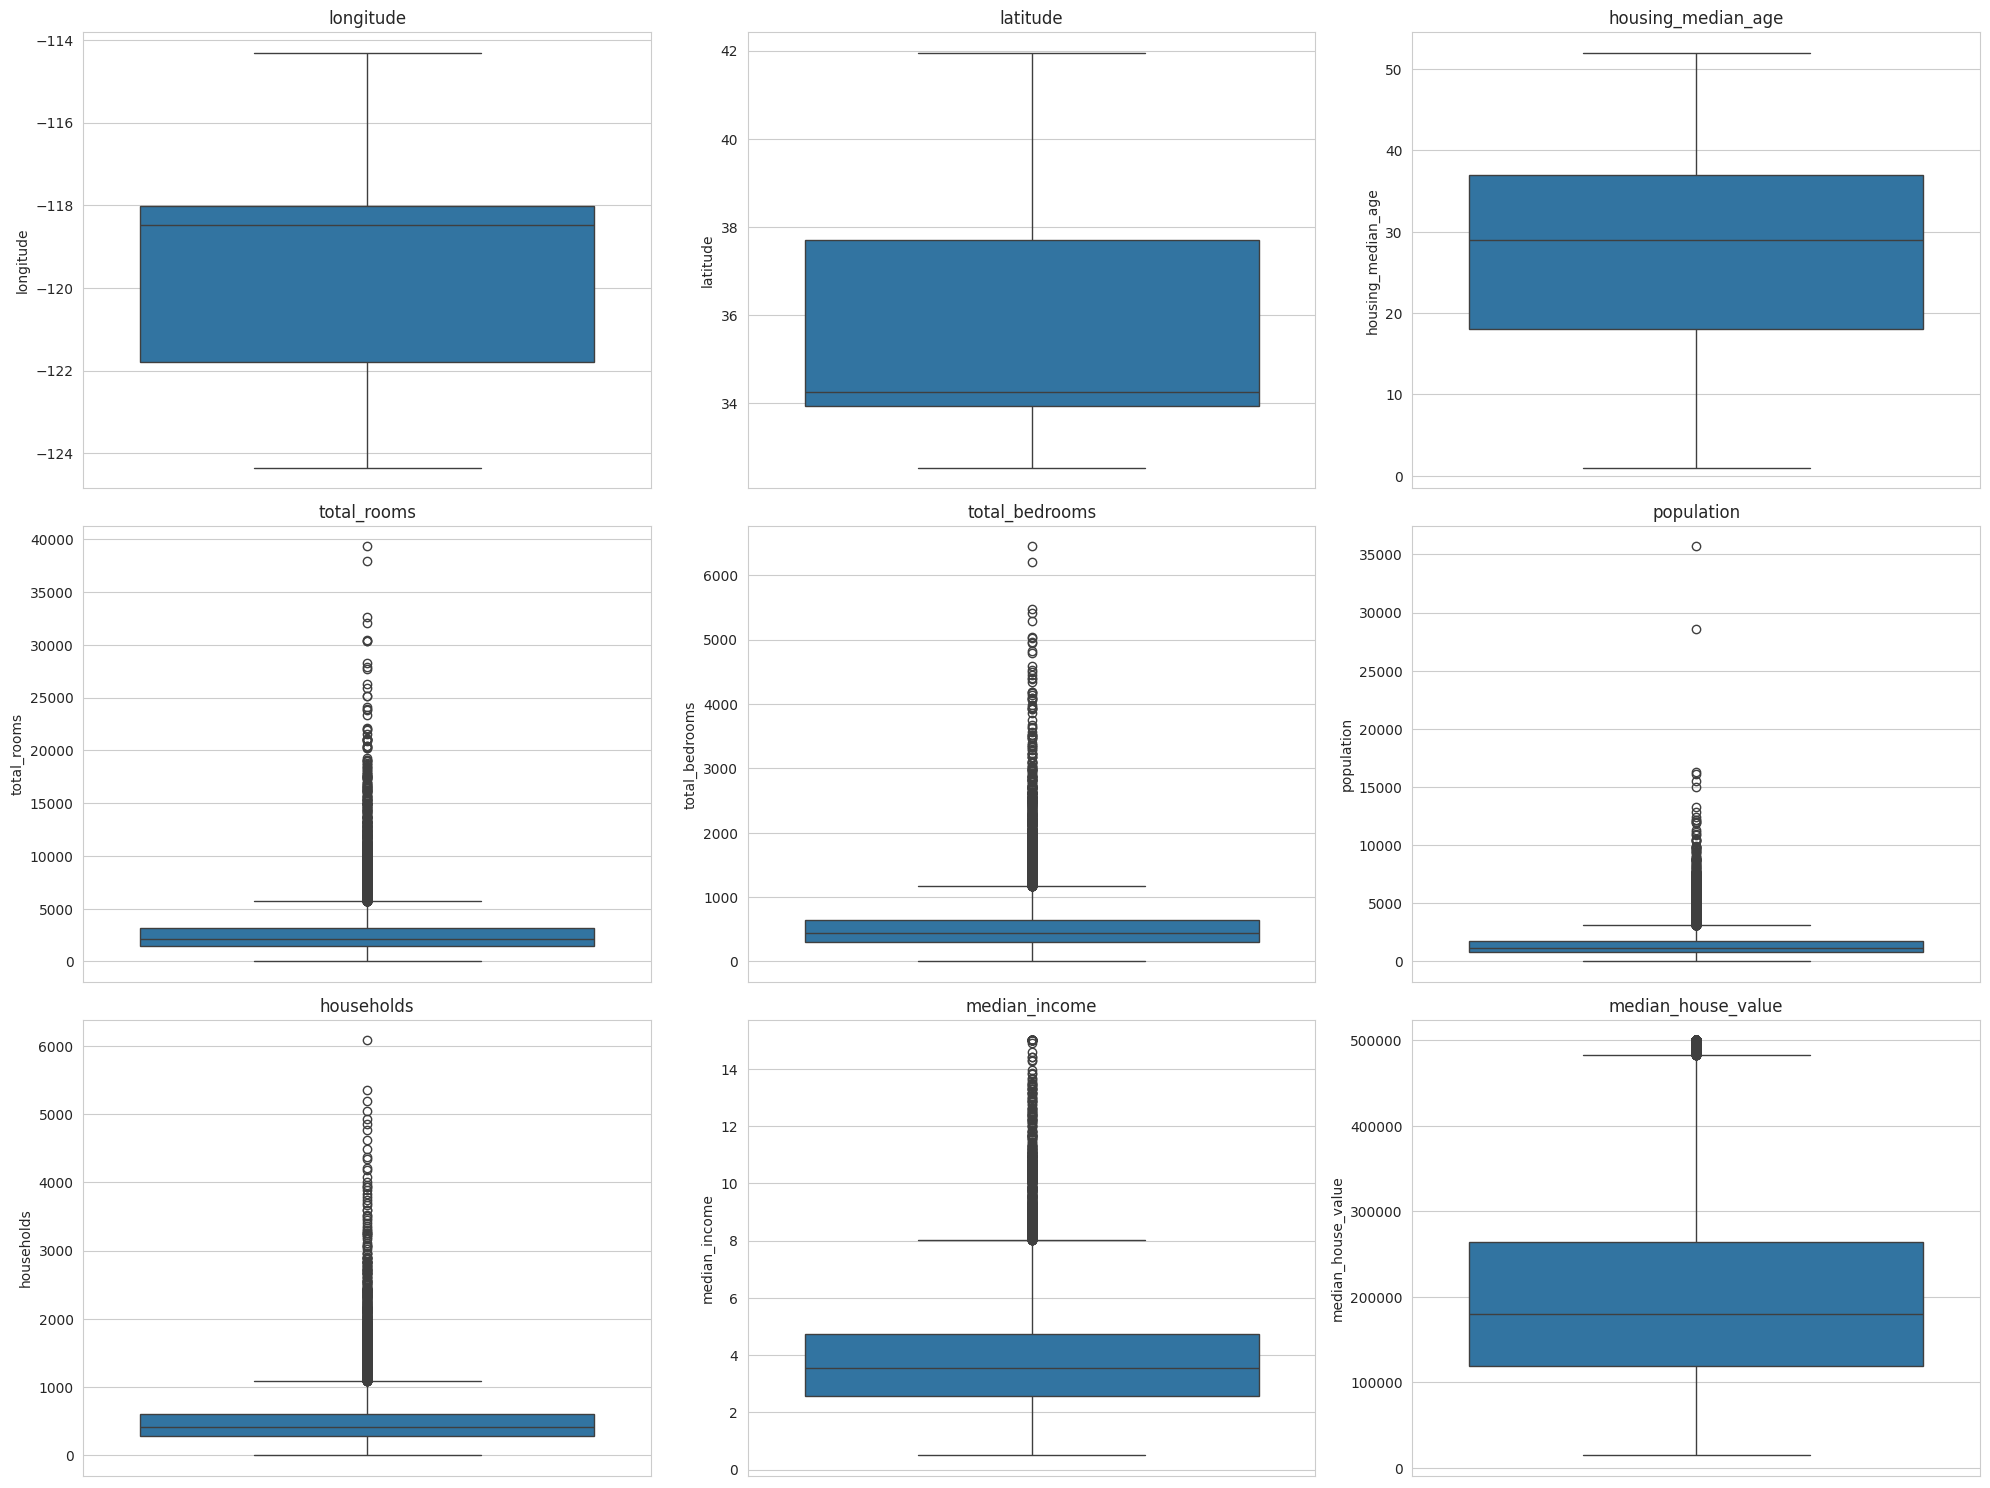

In [297]:
plt.figure(figsize=(20, 15))

for i, column in enumerate(data.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=data[column])
    plt.title(column)

# Adjust layout
plt.tight_layout()
plt.show()


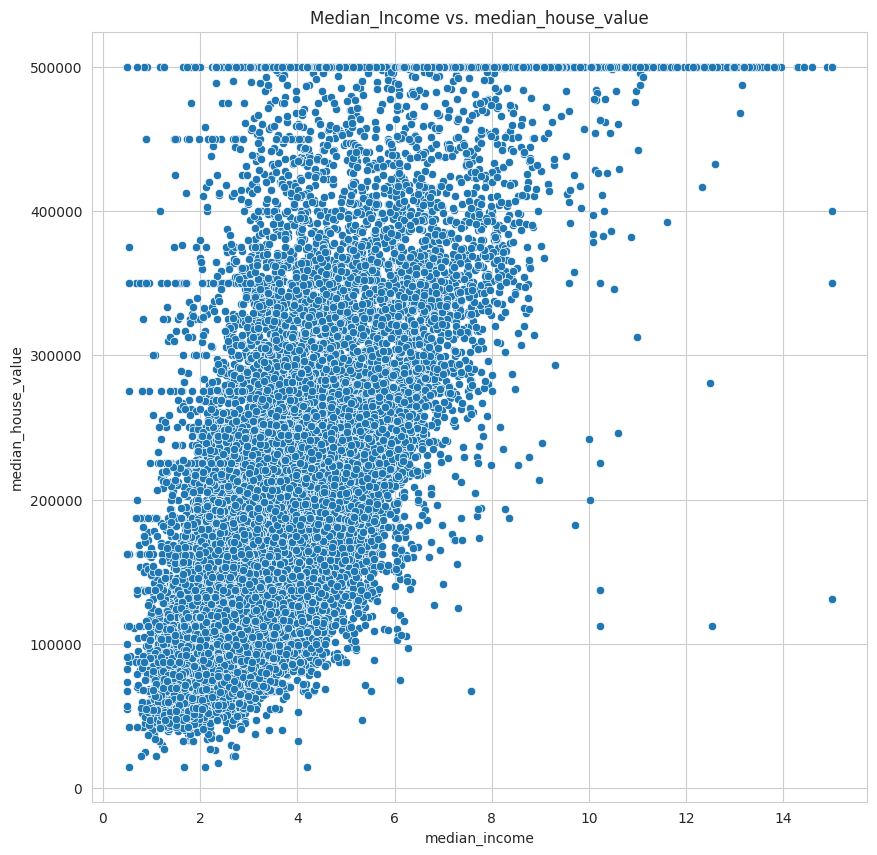

In [326]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=data["median_income"], y=data['median_house_value'])
plt.title(f'Median_Income vs. median_house_value')
plt.show()


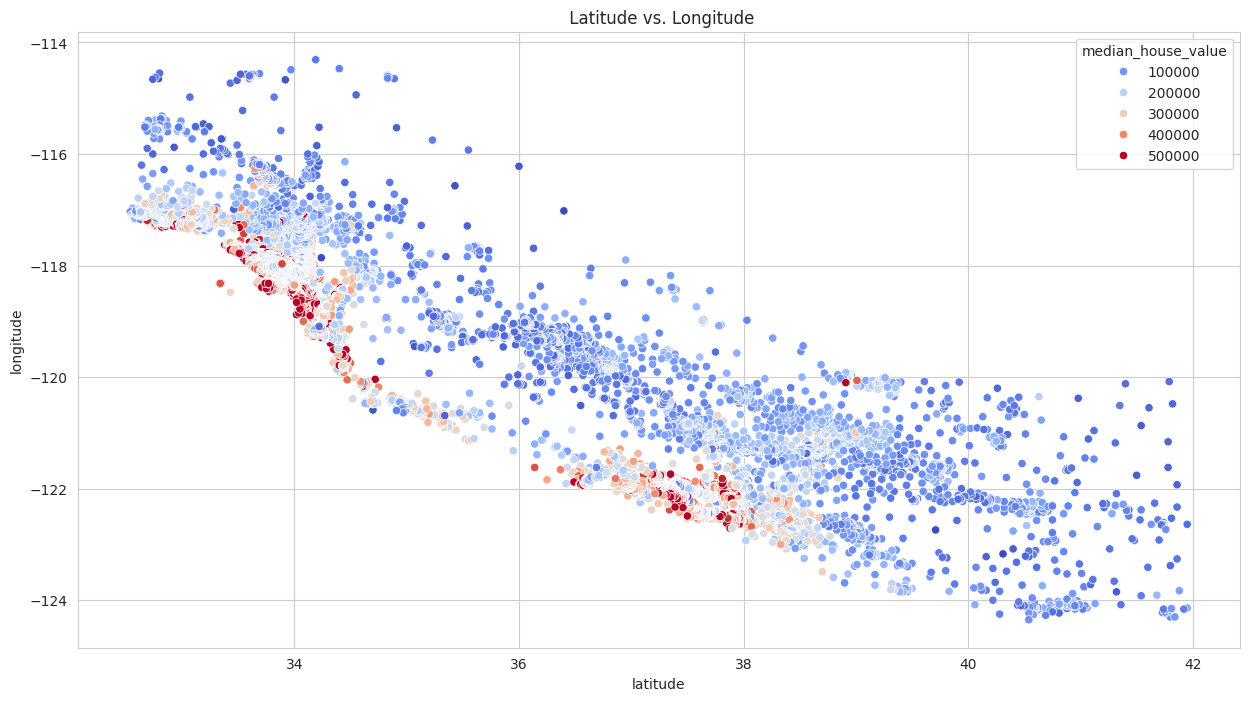

In [300]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=data, hue='median_house_value', palette='coolwarm')
plt.title(" Latitude vs. Longitude")
plt.show()


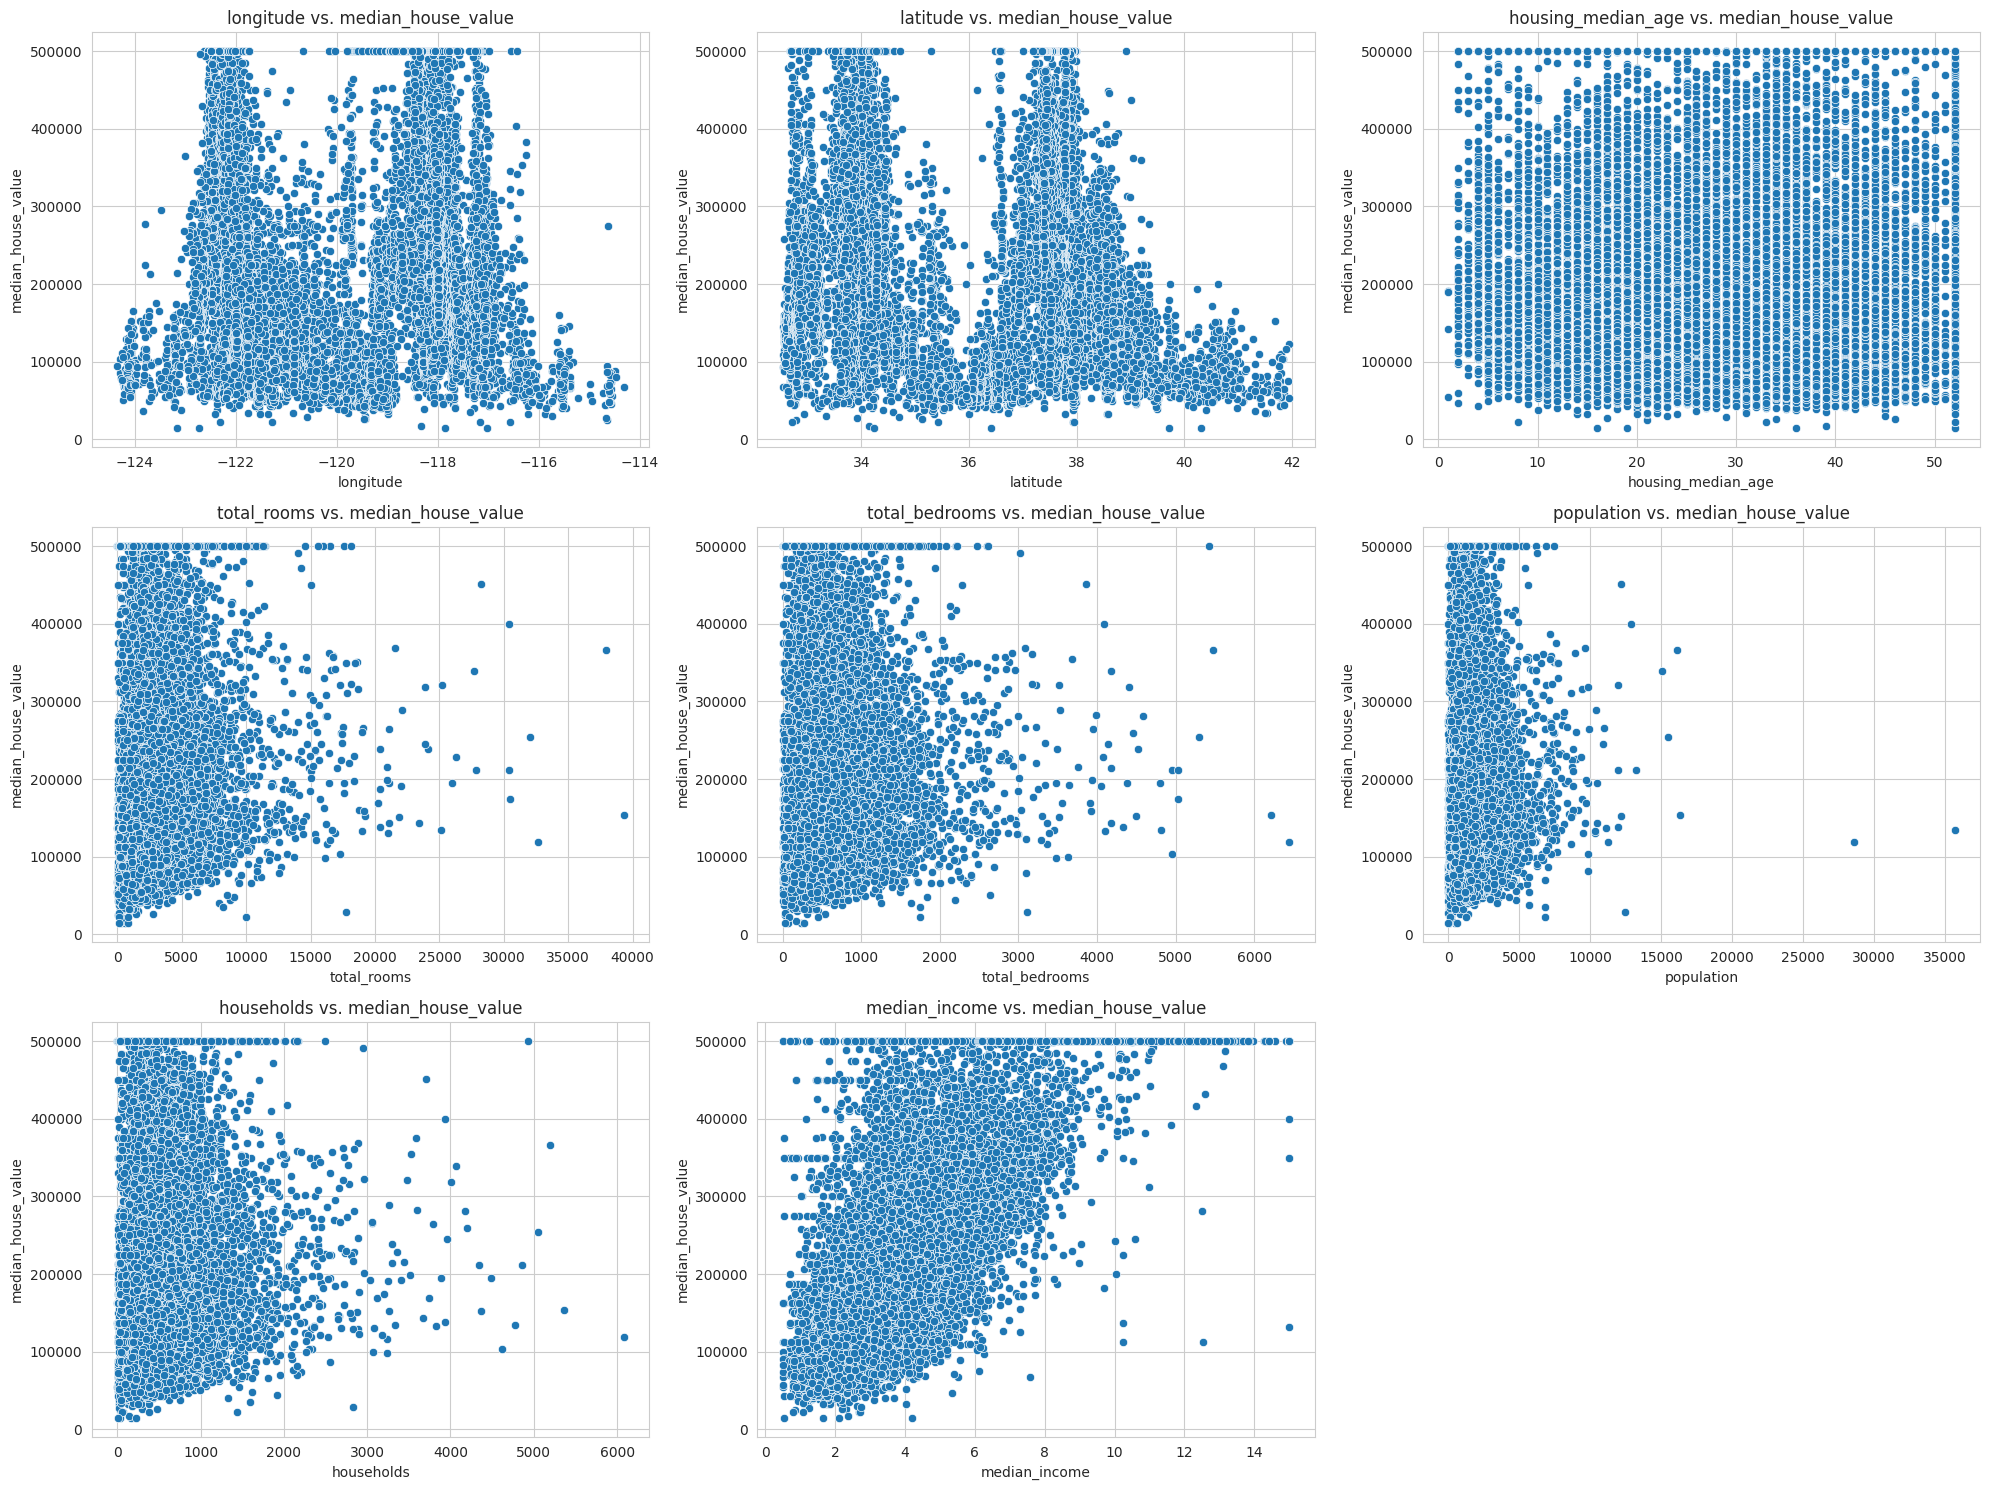

In [301]:
plt.figure(figsize=(20, 15))
for i, column in enumerate(data.columns[:-2], 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=data[column], y=data['median_house_value'])
    plt.title(f'{column} vs. median_house_value')

plt.tight_layout()
plt.show()


In [302]:
ocean_proximity_counts = data['ocean_proximity'].value_counts()
ocean_proximity_counts

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2287
ISLAND           5
Name: count, dtype: int64

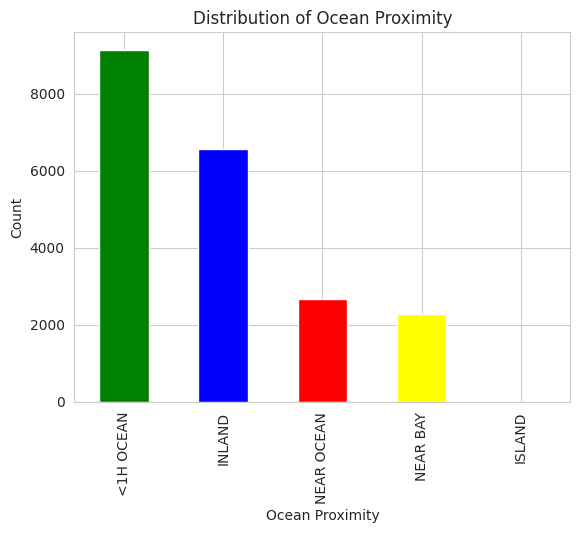

In [303]:
ocean_proximity_counts.plot(kind='bar', color=["green" , "blue" , "red", "yellow", "red"])
plt.title('Distribution of Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.show()

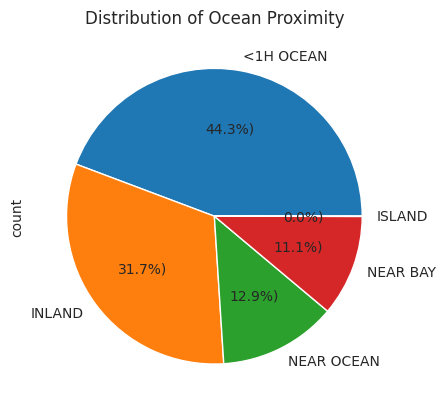

In [304]:
ocean_proximity_counts.plot(kind='pie', autopct='%1.1f%%)')
plt.title('Distribution of Ocean Proximity')
plt.show()

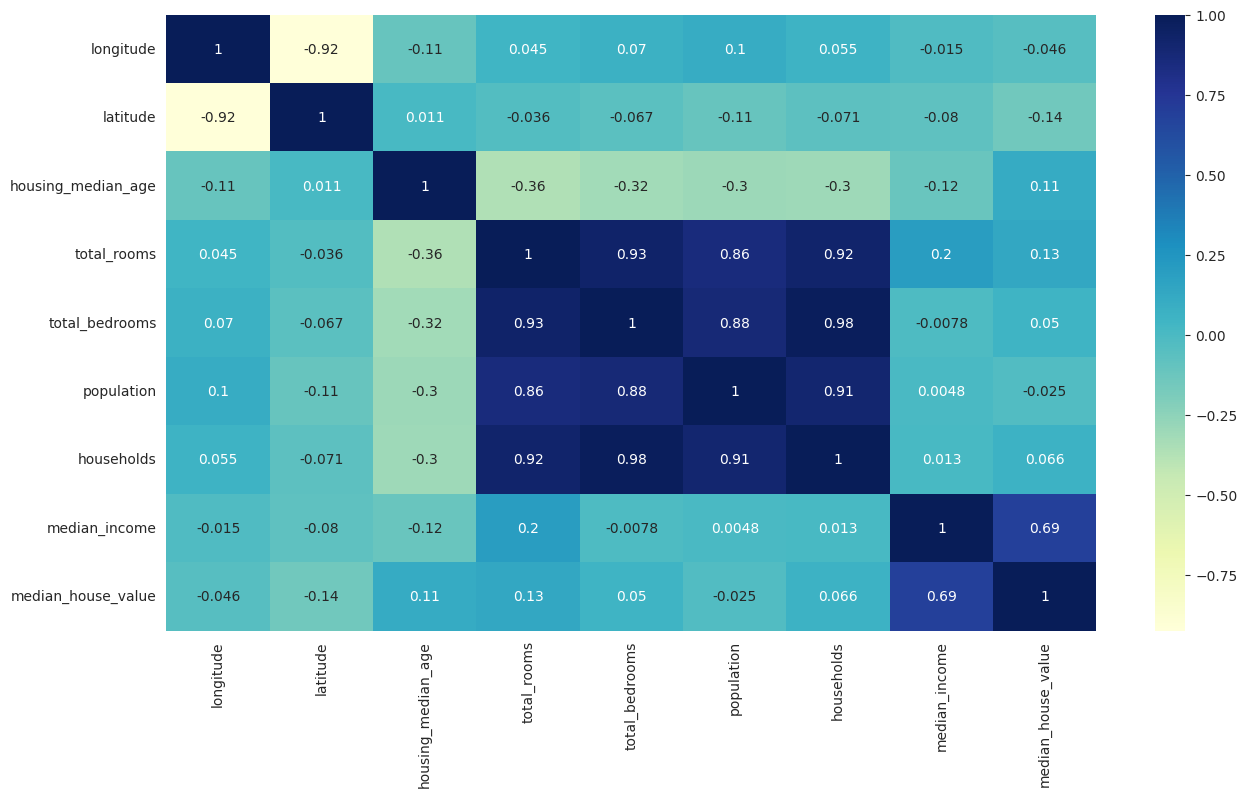

In [305]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
numerical_data = data[numerical_columns]
plt.figure(figsize=(15,8))
sns.heatmap(numerical_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [306]:
# data.dropna(inplace=True)

In [307]:
nom_data = data.select_dtypes(include=["number"])
cat_data = data.select_dtypes(include=["object"])

In [308]:
data.fillna(nom_data.mean(), inplace=True)
# nom_data.fillna(nom_data.median(), inplace=True)
# data.replace(np.nan , data["total_bedrooms" , "households" , "median_house_value"].mean()[0] ,inplace=True)


In [309]:
data.fillna(cat_data.mode().iloc[0], inplace=True)
# data['ocean_proximity'].fillna(data['ocean_proximity'].mode().iloc[0], inplace=True)

In [310]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [311]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [312]:
from sklearn.preprocessing import LabelEncoder
data["ocean_proximity"] = LabelEncoder().fit_transform(data["ocean_proximity"])

#* Anthor Way :
# data['ocean_proximity'].replace(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'] , [0, 1, 2, 3, 4] , inplace=True)


In [313]:
#* OneHotEncoder :
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(sparse=False)
# data["ocean_proximity"] = encoder.fit_transform(data[["ocean_proximity"]])

In [314]:
x = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [315]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126.000000,8.3252,3
1,-122.22,37.86,21,7099,1106.0,2401,1138.000000,8.3014,3
2,-122.24,37.85,52,1467,190.0,496,177.000000,7.2574,3
3,-122.25,37.85,52,1274,235.0,558,219.000000,5.6431,3
4,-122.25,37.85,52,1627,280.0,565,499.575111,3.8462,3
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330.000000,1.5603,1
20636,-121.21,39.49,18,697,150.0,356,114.000000,2.5568,1
20637,-121.22,39.43,17,2254,485.0,1007,433.000000,1.7000,1
20638,-121.32,39.43,18,1860,409.0,741,349.000000,1.8672,1


In [316]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [317]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8
0,-1.327835,1.052548,0.982143,-0.804819,-0.975313,-0.974429,-0.977149,2.344766,1.291489
1,-1.322844,1.043185,-0.607019,2.045890,1.355040,0.861439,1.669909,2.332238,1.291489
2,-1.332827,1.038503,1.856182,-0.535746,-0.829815,-0.820777,-0.843750,1.782699,1.291489
3,-1.337818,1.038503,1.856182,-0.624215,-0.722481,-0.766028,-0.733892,0.932968,1.291489
4,-1.337818,1.038503,1.856182,-0.462404,-0.615146,-0.759847,0.000000,-0.012881,1.291489
...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.390936,-0.512592,-0.443553,-1.216128,-0.116441
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.925224,-0.944405,-1.008537,-0.691593,-0.116441
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.126177,-0.369537,-0.174139,-1.142593,-0.116441
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.307454,-0.604429,-0.393855,-1.054583,-0.116441


In [318]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.75
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.75
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.75
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.75
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.081989,0.230776,0.75
...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.25
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.25
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.25
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.25


In [319]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=19)

In [320]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

LinearRegression()

In [321]:
from sklearn.metrics import mean_squared_error, r2_score
y_train_pred = linear_regression.predict(x_train)
y_test_pred = linear_regression.predict(x_test)

In [322]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Train MSE: {train_mse:.2f} ")
print(f"Test MSE: {test_mse} ")

Train MSE: 4822574107.85 
Test MSE: 5005406363.821747 


In [323]:
import math
train_rmse = math.sqrt(train_mse)
test_rmse = math.sqrt(test_mse)
print(f"Train RMSE: {train_rmse:.2f} ")
print(f"Test RMSE: {test_rmse:.2f}")

Train RMSE: 69444.76 
Test RMSE: 70748.90


In [324]:
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Train R2: {train_r2:.2f}")
print(f"Test R2: {test_r2:.2f}")

Train R2: 0.64
Test R2: 0.62
